***
# Crops (Raw Data Processing)
Capstone Project - Ali Sehpar Shikoh
***

<b> Previous Notebook: CropRemoval-RAW

<b> Next Notebook: FertilizerUse-RAW

This is fourth notebook of the project and deals with the extraction of meaningful data related to the major crop groups (e.g. vegetables, sugar crops etc.) around the world, the area they are harvested on, the production and specific yields obtained. This is the primary raw dataset.

### Exploratory Data Analysis

Importing key libraries and packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

Importing 'Crops-Raw' CSV and converting it in the Crops_Livestock_df dataframe.

In [2]:
Crops_Livestock_df = pd.read_csv('DataFiles/01-RawDataFiles/Crops-RAW/Crops-RAW.csv', encoding = 'latin1') # encoding is set to latin1 to incorporate all the country names.
Crops_Livestock_df.shape

(3786052, 11)

As seen, there are about 4 million rows and 11 columns.

Let's look at the dataset imported.

In [3]:
Crops_Livestock_df.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F


As seen, there are a total of 11 columns present in the dataset.

Checking out the null values.

In [4]:
Crops_Livestock_df.isnull().sum()

Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value           182520
Flag            768232
dtype: int64

As seen there are only two columns that contain null values i.e. 'Value' and 'Flag'.

Since 'Value' is the main column therefore we can drop the null values in this column.

In [5]:
Crops_Livestock_df2 = Crops_Livestock_df.dropna(subset=['Value'])

Checking out for null values again.

In [6]:
Crops_Livestock_df2.isnull().sum()

Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value                0
Flag            764477
dtype: int64

As seen, the null values have been removed from the Value column, which is the main column.

It is not recommended not to remove the blank columns from Flags column as it points to official data, as seen from the table below:


Flag|	Description
----- |-----
*|	Unofficial figure
Blank |	Official data
A|	Aggregate; may include official; semi-official; estimated or calculated data
F|	FAO estimate
Fc|	Calculated data
Im|	FAO data based on imputation methodology
M|	Data not available


Looking at various flag types included in the dataset.

In [7]:
Crops_Livestock_df2['Flag'].unique()

array(['F', 'Im', nan, '*', 'Fc', 'A', 'R'], dtype=object)

Checking the distribution of flags.

In [8]:
Crops_Livestock_df2['Flag'].value_counts()

Fc    1053869
A     1042382
F      349191
Im     316560
*       77044
R           9
Name: Flag, dtype: int64

It is to be noted that M flag is automatic removed with the removal of empty value rows. It is recommended not to remove any of the flags as various methodologies have been used to fill in the gaps within the dataset and minimize the null values. This will prove to be beneficial in making the data as extensive as possible.

Since all the Flag types will be used apart from 'M' (which does not show up in the dataset anymore) therefore we can drop this column as it is redundant. These reason for using all the flag types is mentioned in the first notebook related to the processing of 'Atmospheric Deposition' raw data.

In [9]:
Crops_Livestock_df3 = Crops_Livestock_df2.drop(['Flag'], axis=1)

Looking at the Area column.

In [10]:
Crops_Livestock_df3['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
      

Checking the number of unique entries in the 'Area column'.

In [12]:
Crops_Livestock_df3['Area'].nunique()

245

### Dataset Segregation and Processing

As seen there are a total of 245 unique entries present in the 'Area' column. The data provided is for countries as well as regional groups like 'Least Developed Countries', 'Low Income Food Deficit Countries' etc.

One could get rid of the regional groups using Area code. To do so lets plot the area codes against the respective areas.

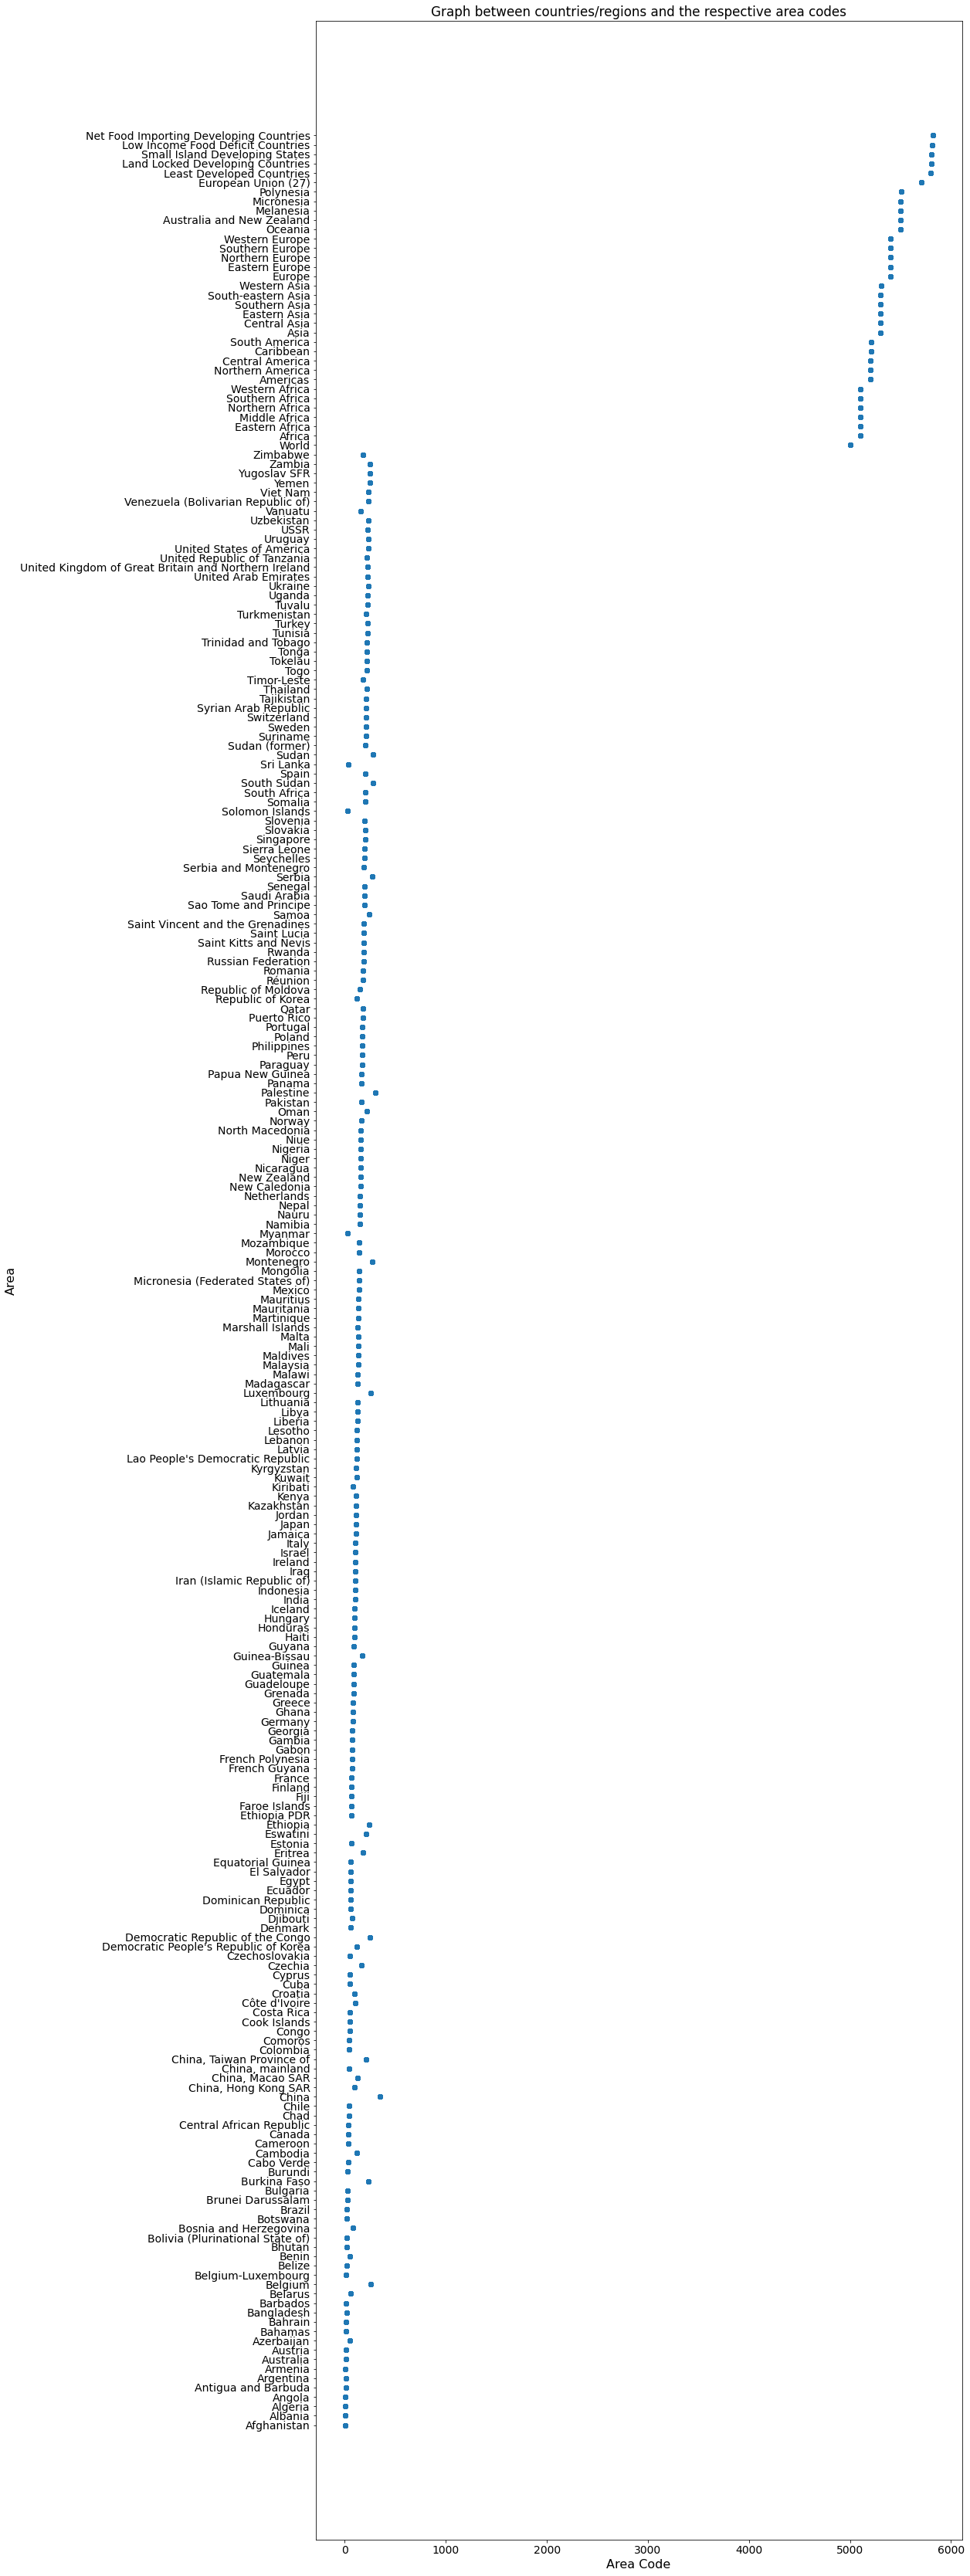

In [ ]:
plt.figure(figsize=(15, 60)) 
plt.rcParams['font.size'] = '14'
plt.scatter(Crops_Livestock_df3['Area Code'], Crops_Livestock_df3['Area']) 
plt.xlabel('Area Code', fontsize = 16) 
plt.ylabel('Area', fontsize = 16)
plt.title('Graph between countries/regions and the respective area codes')
plt.show()

As seen, there is a clear segregation between countries and regions.

Confirming the area code for the 'World'.

In [ ]:
World = Crops_Livestock_df3.loc[(Crops_Livestock_df3['Area'] == 'World')]
World.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value
2807800,5000,World,800,Agave fibres nes,5312,Area harvested,1961,1961,ha,32100.0


As seen, the data for various regions starts with the 'World' category having an area code of 5000.

Filtering out the regional data.

In [14]:
Regions = Crops_Livestock_df3.loc[(Crops_Livestock_df3['Area Code'] >= 5000)]
Regions['Area'].unique()

array(['World', 'Africa', 'Eastern Africa', 'Middle Africa',
       'Northern Africa', 'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union (27)',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries'], dtype=object)

In [15]:
Regions['Area'].nunique()

34

As seen above, there are a total of 34 regions present in the dataset.

Getting rid of the above stated regions.

In [ ]:
Crops_Livestock_df4 = Crops_Livestock_df3.loc[(Crops_Livestock_df3['Area Code'] < 5000)]

Looking at the Area column to confirm if the regions have been removed.

In [ ]:
Crops_Livestock_df4['Area'].value_counts().sort_index()

Afghanistan            13387
Albania                14733
Algeria                17931
Angola                 12091
Antigua and Barbuda     8887
                       ...  
Viet Nam               14305
Yemen                  14443
Yugoslav SFR            9226
Zambia                 10974
Zimbabwe               17531
Name: Area, Length: 211, dtype: int64

As seen the regional groups have been removed from 'Area' column, with a total of 211 countries mentioned now.

Let's look at the various corp and livestock items included in the dataset.

In [ ]:
Crops_Livestock_df4['Item'].value_counts()

Eggs, hen, in shell        44426
Meat, Poultry              33338
Meat, chicken              33330
Vegetables Primary         33135
Roots and Tubers, Total    33054
                           ...  
Kapokseed in shell           118
Snails, not sea              117
Jojoba seed                  117
Gums, natural                106
Cassava leaves                93
Name: Item, Length: 299, dtype: int64

As seen, there 299 items categories related to crops and livestock i.e. 'Meat, Poultry', 'Vegetables Primary' etc.

Since the project is related to predicting the yield of crops, therefore livestock related categories will be discarded. Also only 8 primary crops groups will be included i.e. Cereals, Sugar Crops, Sugar Cane, Vegetables Primary, Maize, Roots and Tubers, Fruit Primary and Rice, Paddy. These crops groups are marked as the most produced commodities in the world according to Food and Agriculture Organization [1].

In [ ]:
Crops_Livestock_df5 = Crops_Livestock_df4.loc[(Crops_Livestock_df4['Item'] == 'Cereals, Total') | (Crops_Livestock_df4['Item'] == 'Sugar Crops Primary') | (Crops_Livestock_df4['Item'] == 'Sugar cane') | (Crops_Livestock_df4['Item'] == 'Vegetables Primary') | (Crops_Livestock_df4['Item'] == 'Maize') | (Crops_Livestock_df4['Item'] == 'Roots and Tubers, Total') | (Crops_Livestock_df4['Item'] == 'Fruit Primary') | (Crops_Livestock_df4['Item'] == 'Rice, paddy')]
Crops_Livestock_df5['Item'].value_counts()

Vegetables Primary         33135
Roots and Tubers, Total    33054
Fruit Primary              32806
Cereals, Total             30292
Maize                      27406
Sugar Crops Primary        24092
Rice, paddy                20853
Sugar cane                 17873
Name: Item, dtype: int64

Lets look at the Element column.

In [ ]:
Crops_Livestock_df5['Element'].unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

As seen, the 'Element' column is a combination of 3 different variables. We need to separate them in order to make more sense of the dataset.

Processing for 'Production' variable.

In [ ]:
df_Production = Crops_Livestock_df5.loc[Crops_Livestock_df5['Element'] == 'Production']
df_Production.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value
3646,2,Afghanistan,56,Maize,5510,Production,1961,1961,tonnes,700000.0
3647,2,Afghanistan,56,Maize,5510,Production,1962,1962,tonnes,700000.0


Renaming the columns to either include more information or discard redundant information.

In [ ]:
df_Production1 = df_Production.drop(['Year Code', 'Element', 'Element Code', 'Unit'], axis=1) # removing redundant columns.
df_Production1.rename(columns = {'Value':'Production (tonnes)'}, inplace = True)
df_Production2 = df_Production1[['Area Code', 'Area', 'Year', 'Item Code', 'Item', 'Production (tonnes)']]
df_Production2.head(2)

,Area Code,Area,Year,Item Code,Item,Production (tonnes)
3646,2,Afghanistan,1961,56,Maize,700000.0
3647,2,Afghanistan,1962,56,Maize,700000.0


Checking out the shape of the newly created 'df_Production2' dataframe.

In [ ]:
df_Production2.shape

(73687, 6)

As seen, the 'df_Production2' has a total of about 7 thousand rows and 6 columns.

Processing for 'Area_harvested' variable.

In [ ]:
df_Area_harvested = Crops_Livestock_df5.loc[Crops_Livestock_df5['Element'] == 'Area harvested']
df_Area_harvested.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value
3526,2,Afghanistan,56,Maize,5312,Area harvested,1961,1961,ha,500000.0
3527,2,Afghanistan,56,Maize,5312,Area harvested,1962,1962,ha,500000.0


Renaming the columns to either include more information or discard redundant information.

In [ ]:
df_Area_harvested1 = df_Area_harvested.drop(['Year Code', 'Element', 'Element Code', 'Unit'], axis=1) # removing redundant columns.
df_Area_harvested1.rename(columns = {'Value':'Area Harvested (ha)'}, inplace = True)
df_Area_harvested2 = df_Area_harvested1[['Area Code', 'Area', 'Year', 'Item Code', 'Item', 'Area Harvested (ha)']]
df_Area_harvested2.head(2)

,Area Code,Area,Year,Item Code,Item,Area Harvested (ha)
3526,2,Afghanistan,1961,56,Maize,500000.0
3527,2,Afghanistan,1962,56,Maize,500000.0


Checking out the shape of the newly created 'df_Area_harvested2' dataframe.

In [ ]:
df_Area_harvested2.shape

(73243, 6)

As seen, the 'df_Area_harvested2' has a total of about 7 thousand rows and 6 columns.

Processing for 'Yield' variable.

In [ ]:
df_Yield = Crops_Livestock_df5.loc[Crops_Livestock_df5['Element'] == 'Yield']
df_Yield.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value
3586,2,Afghanistan,56,Maize,5419,Yield,1961,1961,hg/ha,14000.0
3587,2,Afghanistan,56,Maize,5419,Yield,1962,1962,hg/ha,14000.0


Renaming the columns to either include more information or discard redundant information.

In [ ]:
df_Yield1 = df_Yield.drop(['Year Code', 'Element', 'Element Code', 'Unit'], axis=1) # removing redundant columns.
df_Yield1.rename(columns = {'Value':'Yield (hg/ha)'}, inplace = True)
df_Yield2 = df_Yield1[['Area Code', 'Area', 'Year', 'Item Code', 'Item', 'Yield (hg/ha)']]
df_Yield2.head(2)

,Area Code,Area,Year,Item Code,Item,Yield (hg/ha)
3586,2,Afghanistan,1961,56,Maize,14000.0
3587,2,Afghanistan,1962,56,Maize,14000.0


Checking out the shape of the newly created 'df_Yield2' dataframe.

In [ ]:
df_Yield2.shape

(72581, 6)

As seen, the 'df_Yield2' has a total of about 7 thousand rows and 6 columns.

Joining datasets related to crop production, area harvested and the yield obtained using a left join. Since df_Production2 has the maximum number of rows therefore this dataframe will be on the left side. A left join is implemented based on 'Area Code', 'Area', 'Year', 'Item Code' and 'Item' columns.

In [ ]:
Crops_Livestock_df6 = df_Production2.merge(df_Area_harvested2, how='left', left_on=["Area Code", 'Area', "Year", 'Item Code', 'Item'], right_on=["Area Code", 'Area', "Year", 'Item Code', 'Item'])
Crops_Livestock_df6

,Area Code,Area,Year,Item Code,Item,Production (tonnes),Area Harvested (ha)
0,2,Afghanistan,1961,56,Maize,700000.0,500000.0
1,2,Afghanistan,1962,56,Maize,700000.0,500000.0
2,2,Afghanistan,1963,56,Maize,713000.0,500000.0
3,2,Afghanistan,1964,56,Maize,720000.0,505000.0
4,2,Afghanistan,1965,56,Maize,720000.0,500000.0
...,...,...,...,...,...,...,...
73682,181,Zimbabwe,2016,1735,Vegetables Primary,230241.0,33022.0
73683,181,Zimbabwe,2017,1735,Vegetables Primary,226588.0,33423.0
73684,181,Zimbabwe,2018,1735,Vegetables Primary,228299.0,33670.0
73685,181,Zimbabwe,2019,1735,Vegetables Primary,228963.0,33483.0


Although yield dataframe can be joined with the above dataframe however if is not recommended as it tends to reduce the number of rows obtained owing to increased number of null values once Left join is implemented. One could simple calculate the Yield column as seen below:

In [ ]:
Crops_Livestock_df6['Yield (hg/ha)'] = (Crops_Livestock_df6['Production (tonnes)']/Crops_Livestock_df6['Area Harvested (ha)'])*10000
Crops_Livestock_df6

,Area Code,Area,Year,Item Code,Item,Production (tonnes),Area Harvested (ha),Yield (hg/ha)
0,2,Afghanistan,1961,56,Maize,700000.0,500000.0,14000.000000
1,2,Afghanistan,1962,56,Maize,700000.0,500000.0,14000.000000
2,2,Afghanistan,1963,56,Maize,713000.0,500000.0,14260.000000
3,2,Afghanistan,1964,56,Maize,720000.0,505000.0,14257.425743
4,2,Afghanistan,1965,56,Maize,720000.0,500000.0,14400.000000
...,...,...,...,...,...,...,...,...
73682,181,Zimbabwe,2016,1735,Vegetables Primary,230241.0,33022.0,69723.517655
73683,181,Zimbabwe,2017,1735,Vegetables Primary,226588.0,33423.0,67794.034048
73684,181,Zimbabwe,2018,1735,Vegetables Primary,228299.0,33670.0,67804.870805
73685,181,Zimbabwe,2019,1735,Vegetables Primary,228963.0,33483.0,68381.865424


Lets now separate the major crop groups from 'Item' columns.

Filtering out statistics related to Maize crops. Subsequently renaming the columns to include either more information or discard already existing redundant information.

In [ ]:
Maize = Crops_Livestock_df6.loc[(Crops_Livestock_df6['Item'] == 'Maize')]
Maize = Maize.dropna(subset=['Yield (hg/ha)'])
Maize.rename(columns = {'Production (tonnes)':'Maize Production (tonnes)', 'Area Harvested (ha)' : 'Maize Area Harvested (ha)', 'Yield (hg/ha)' : 'Maize Yield (hg/ha)'}, inplace = True)
Maize = Maize.drop(['Item Code', 'Item'], 1)
Maize.head(2)

C:\Users\User\AppData\Local\Temp\ipykernel_22556\4018389352.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Maize = Maize.drop(['Item Code', 'Item'], 1)


,Area Code,Area,Year,Maize Production (tonnes),Maize Area Harvested (ha),Maize Yield (hg/ha)
0,2,Afghanistan,1961,700000.0,500000.0,14000.0
1,2,Afghanistan,1962,700000.0,500000.0,14000.0


Checking out the shape of the 'Maize' dataframe.

In [ ]:
Maize.shape

(9134, 6)

A seen, there are a total of 9134 rows and 6 columns.

Filtering for Rice, paddy. Subsequently renaming the columns to include either more information or discard already existing redundant information.

In [ ]:
Rice_paddy = Crops_Livestock_df6.loc[(Crops_Livestock_df6['Item'] == 'Rice, paddy')]
Rice_paddy = Rice_paddy.dropna(subset=['Yield (hg/ha)'])
Rice_paddy.rename(columns = {'Production (tonnes)':'Rice paddy Production (tonnes)', 'Area Harvested (ha)' : 'Rice paddy Area Harvested (ha)', 'Yield (hg/ha)' : 'Rice paddy Yield (hg/ha)'}, inplace = True)
Rice_paddy = Rice_paddy.drop(['Item Code', 'Item'], 1)
Rice_paddy.head(2)

C:\Users\User\AppData\Local\Temp\ipykernel_22556\693382619.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Rice_paddy = Rice_paddy.drop(['Item Code', 'Item'], 1)


,Area Code,Area,Year,Rice paddy Production (tonnes),Rice paddy Area Harvested (ha),Rice paddy Yield (hg/ha)
60,2,Afghanistan,1961,319000.0,210000.0,15190.47619
61,2,Afghanistan,1962,319000.0,210000.0,15190.47619


Looking at the shape.

In [ ]:
Rice_paddy.shape

(6849, 6)

The Rice paddy dataframe consists of around 7 thousand rows and 6 columns.

Filtering out data for Sugar cane crop. Subsequently renaming the columns to include either more information or discard already existing redundant information.

In [ ]:
Sugar_cane = Crops_Livestock_df6.loc[(Crops_Livestock_df6['Item'] == 'Sugar cane')]
Sugar_cane = Sugar_cane.dropna(subset=['Yield (hg/ha)'])
Sugar_cane.rename(columns = {'Production (tonnes)':'Sugar cane Production (tonnes)', 'Area Harvested (ha)' : 'Sugar cane Area Harvested (ha)', 'Yield (hg/ha)' : 'Sugar cane Yield (hg/ha)'}, inplace = True)
Sugar_cane = Sugar_cane.drop(['Item Code', 'Item'], 1)
Sugar_cane.head(2)

C:\Users\User\AppData\Local\Temp\ipykernel_22556\2199055087.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Sugar_cane = Sugar_cane.drop(['Item Code', 'Item'], 1)


,Area Code,Area,Year,Sugar cane Production (tonnes),Sugar cane Area Harvested (ha),Sugar cane Yield (hg/ha)
120,2,Afghanistan,1961,45000.0,1800.0,250000.0
121,2,Afghanistan,1962,45000.0,1800.0,250000.0


Observing the dataframe shape.

In [ ]:
Sugar_cane.shape

(5914, 6)

As seen, the 'Sugar_cane' dataframe had 5914 rows and 6 columns.

Filtering data out for Cereals crop group and renaming the columns.

In [ ]:
Cereals = Crops_Livestock_df6.loc[(Crops_Livestock_df6['Item'] == 'Cereals, Total')]
Cereals = Cereals.dropna(subset=['Yield (hg/ha)'])
Cereals.rename(columns = {'Production (tonnes)':'Total Cereals Production (tonnes)', 'Area Harvested (ha)' : 'Total Cereals Area Harvested (ha)', 'Yield (hg/ha)' : 'Total Cereals Yield (hg/ha)'}, inplace = True)
Cereals = Cereals.drop(['Item Code', 'Item'], 1)
Cereals.head(2)

C:\Users\User\AppData\Local\Temp\ipykernel_22556\4213984112.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Cereals = Cereals.drop(['Item Code', 'Item'], 1)


,Area Code,Area,Year,Total Cereals Production (tonnes),Total Cereals Area Harvested (ha),Total Cereals Yield (hg/ha)
180,2,Afghanistan,1961,3695000.0,3313500.0,11151.350536
181,2,Afghanistan,1962,3696000.0,3425500.0,10789.665742


Checking out the shape of the cereals dataset.

In [ ]:
Cereals.shape

(10082, 6)

As seen, the cereals dataset has a total of 10082 rows and 6 columns.

Filtering data out for the 'Fruits' group and renaming the columns to be more meaningful.

In [ ]:
Fruit = Crops_Livestock_df6.loc[(Crops_Livestock_df6['Item'] == 'Fruit Primary')]
Fruit = Fruit.dropna(subset=['Yield (hg/ha)'])
Fruit.rename(columns = {'Production (tonnes)':'Fruit Primary Production (tonnes)', 'Area Harvested (ha)' : 'Fruit Primary Area Harvested (ha)', 'Yield (hg/ha)' : 'Fruit Primary Yield (hg/ha)'}, inplace = True)
Fruit = Fruit.drop(['Item Code', 'Item'], 1)
Fruit.head(2)

C:\Users\User\AppData\Local\Temp\ipykernel_22556\2519968897.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Fruit = Fruit.drop(['Item Code', 'Item'], 1)


,Area Code,Area,Year,Fruit Primary Production (tonnes),Fruit Primary Area Harvested (ha),Fruit Primary Yield (hg/ha)
240,2,Afghanistan,1961,567200.0,108699.0,52180.792832
241,2,Afghanistan,1962,565000.0,108550.0,52049.746661


Checking out the head of the created 'Fruit2' dataframe.

In [ ]:
Fruit2 = Crops_Livestock_df2.loc[(Crops_Livestock_df2['Item'] == 'Fruit Primary') & (Crops_Livestock_df2['Element'] == 'Yield')]
Fruit2.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
11625,2,Afghanistan,1738,Fruit Primary,5419,Yield,1961,1961,hg/ha,52181.0,Fc
11626,2,Afghanistan,1738,Fruit Primary,5419,Yield,1962,1962,hg/ha,52050.0,Fc


Checking the element column.

In [ ]:
Fruit2["Element"].unique()

array(['Yield'], dtype=object)

Checking the flag column.

In [ ]:
Fruit2['Flag'].unique()

array(['Fc'], dtype=object)

As seen from 'Flag' column the fruits dataset comprises completely of calculated values.

Although as a major crop, fruits dataframe should be included in main crops dataframe. However, this crop's statistics are totally based on calculated fields with unrealistic estimations for the beginning years, as seen from the graph below.

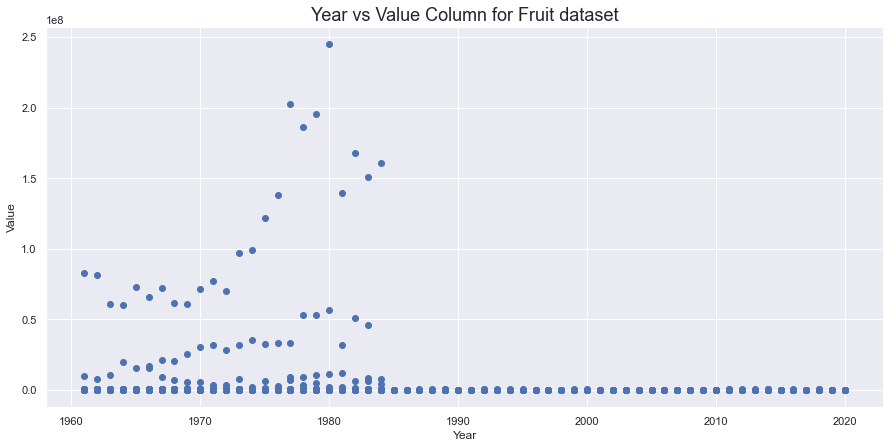

In [ ]:
plt.figure(figsize=(15, 7)) 
plt.scatter(Fruit2['Year'], Fruit2['Value']) 
plt.xlabel('Year', size=12) 
plt.ylabel('Value', size=12) 
plt.title('Year vs Value Column for Fruit dataset', size=18) 
plt.show() 

It is recommended to ignore the 'Fruit' group statistics as it overestimates the total yield (obtained by summing up the yield of various crop groups) for a specific number of years. The effect of overestimation was observed on a later stage and thus I had to come back to this notebook to ignore the fruit dataset.

One could cancel out the overestimated values in the fruit dataset, however, this will reduce the number of rows in the final dataset. Therefore, it was recommended not to include this dataset in the calculation of overall yield.

Filtering out data for 'Roots and Tubers, Total' crop group and renaming various columns.

In [ ]:
Roots = Crops_Livestock_df6.loc[(Crops_Livestock_df6['Item'] == 'Roots and Tubers, Total')]
Roots = Roots.dropna(subset=['Yield (hg/ha)'])
Roots.rename(columns = {'Production (tonnes)':'Total Roots and Tubers Production (tonnes)', 'Area Harvested (ha)' : 'Total Roots and Tubers Area Harvested (ha)', 'Yield (hg/ha)' : 'Total Roots and Tubers Yield (hg/ha)'}, inplace = True)
Roots = Roots.drop(['Item Code', 'Item'], 1)
Roots.head(2)

,Area Code,Area,Year,Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha)
300,2,Afghanistan,1961,130000.0,15000.0,86666.666667
301,2,Afghanistan,1962,115000.0,15000.0,76666.666667


Looking at the shape of the filtered dataset.

In [ ]:
Roots.shape

(11009, 6)

As seen the roots dataset contains 11009 rows and 6 columns.

Filtering out data for 'Sugar Crops Primary' crop group and renaming columns.

In [ ]:
Sugar_Crops = Crops_Livestock_df6.loc[(Crops_Livestock_df6['Item'] == 'Sugar Crops Primary')]
Sugar_Crops = Sugar_Crops.dropna(subset=['Yield (hg/ha)'])
Sugar_Crops.rename(columns = {'Production (tonnes)':'Primary Sugar Crops Production (tonnes)', 'Area Harvested (ha)' : 'Primary Sugar Crops Area Harvested (ha)', 'Yield (hg/ha)' : 'Primary Sugar Crops Yield (hg/ha)'}, inplace = True)
Sugar_Crops = Sugar_Crops.drop(['Item Code', 'Item'], 1)
Sugar_Crops.head(2)

,Area Code,Area,Year,Primary Sugar Crops Production (tonnes),Primary Sugar Crops Area Harvested (ha),Primary Sugar Crops Yield (hg/ha)
360,2,Afghanistan,1961,87400.0,5337.0,163762.413341
361,2,Afghanistan,1962,105456.0,5400.0,195288.888889


Looking at the shape of the filtered dataset.

In [ ]:
Sugar_Crops.shape

(7941, 6)

As seen the Sugar_Crops dataset contains 7941 rows and 6 columns.

Filtering out data for 'Vegetables Primary' crop group and renaming columns.

In [ ]:
Vegetables = Crops_Livestock_df6.loc[(Crops_Livestock_df6['Item'] == 'Vegetables Primary')]
Vegetables = Vegetables.dropna(subset=['Yield (hg/ha)'])
Vegetables.rename(columns = {'Production (tonnes)':'Primary Vegetables Production (tonnes)', 'Area Harvested (ha)' : 'Primary Vegetables Area Harvested (ha)', 'Yield (hg/ha)' : 'Primary Vegetables Yield (hg/ha)'}, inplace = True)
Vegetables = Vegetables.drop(['Item Code', 'Item'], 1)
Vegetables.head(2)

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha)
420,2,Afghanistan,1961,291300.0,68700.0,42401.746725
421,2,Afghanistan,1962,306300.0,68700.0,44585.152838


Looking at the shape of the filtered dataset.

In [ ]:
Vegetables.shape

(11056, 6)

As seen the vegetables dataset contains 11056 rows and 6 columns.

### Refined Dataset Creation by Combining Various Datasets

Combining various crop group specific datasets. Since 'Vegetables' dataset has the maximum number of rows therefore all the datasets will be combined with this dataset using left join.

Combining 'Vegetables' and 'Roots' datasets.

In [ ]:
Crops_Livestock_df7 = Vegetables.merge(Roots, how='left', left_on=["Area", "Year", 'Area Code'], right_on=["Area", "Year", 'Area Code'])
Crops_Livestock_df7

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000
...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903


Combining 'Crops_Livestock_df7' and 'Cereals' datasets.

In [ ]:
Crops_Livestock_df8 = Crops_Livestock_df7.merge(Cereals, how='left', left_on=["Area", "Year", 'Area Code'], right_on=["Area", "Year", 'Area Code'])
Crops_Livestock_df8

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),Total Cereals Area Harvested (ha),Total Cereals Yield (hg/ha)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,3313500.0,11151.350536
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,3425500.0,10789.665742
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,3426500.0,9858.456151
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,3446500.0,10828.376614
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,3444500.0,10988.532443
...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,1555271.0,4351.318838
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,1453383.0,12027.118798
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,1430844.0,12421.556787
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,567142.0,11736.619753


Combining 'Crops_Livestock_df8' and 'Maize' datasets.

In [ ]:
Crops_Livestock_df9 = Crops_Livestock_df8.merge(Maize, how='left', left_on=["Area", "Year", 'Area Code'], right_on=["Area", "Year", 'Area Code'])
Crops_Livestock_df9

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),Total Cereals Area Harvested (ha),Total Cereals Yield (hg/ha),Maize Production (tonnes),Maize Area Harvested (ha),Maize Yield (hg/ha)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,3313500.0,11151.350536,700000.0,500000.0,14000.000000
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,3425500.0,10789.665742,700000.0,500000.0,14000.000000
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,3426500.0,9858.456151,713000.0,500000.0,14260.000000
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,3446500.0,10828.376614,720000.0,505000.0,14257.425743
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,3444500.0,10988.532443,720000.0,500000.0,14400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,1555271.0,4351.318838,511816.0,1161997.0,4404.624108
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,1453383.0,12027.118798,1532572.0,1099945.0,13933.169386
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,1430844.0,12421.556787,1560100.0,1155075.0,13506.482263
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,567142.0,11736.619753,509322.0,447926.0,11370.672834


Combining 'Crops_Livestock_df9' and 'Sugar_Crops' datasets.

In [ ]:
Crops_Livestock_df10 = Crops_Livestock_df9.merge(Sugar_Crops, how='left', left_on=["Area", "Year", 'Area Code'], right_on=["Area", "Year", 'Area Code'])
Crops_Livestock_df10

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),Total Cereals Area Harvested (ha),Total Cereals Yield (hg/ha),Maize Production (tonnes),Maize Area Harvested (ha),Maize Yield (hg/ha),Primary Sugar Crops Production (tonnes),Primary Sugar Crops Area Harvested (ha),Primary Sugar Crops Yield (hg/ha)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,3313500.0,11151.350536,700000.0,500000.0,14000.000000,87400.0,5337.0,163762.413341
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,3425500.0,10789.665742,700000.0,500000.0,14000.000000,105456.0,5400.0,195288.888889
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,3426500.0,9858.456151,713000.0,500000.0,14260.000000,101225.0,5400.0,187453.703704
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,3446500.0,10828.376614,720000.0,505000.0,14257.425743,76000.0,5300.0,143396.226415
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,3444500.0,10988.532443,720000.0,500000.0,14400.000000,107000.0,6000.0,178333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,1555271.0,4351.318838,511816.0,1161997.0,4404.624108,3483000.0,43500.0,800689.655172
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,1453383.0,12027.118798,1532572.0,1099945.0,13933.169386,3101000.0,41000.0,756341.463415
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,1430844.0,12421.556787,1560100.0,1155075.0,13506.482263,3582994.0,45000.0,796220.888889
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,567142.0,11736.619753,509322.0,447926.0,11370.672834,3562000.0,46000.0,774347.826087


Combining 'Crops_Livestock_df10' and 'Rice_paddy' datasets.

In [ ]:
Crops_Livestock_df11 = Crops_Livestock_df10.merge(Rice_paddy, how='left', left_on=["Area", "Year", 'Area Code'], right_on=["Area", "Year", 'Area Code'])
Crops_Livestock_df11

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Total Cereals Yield (hg/ha),Maize Production (tonnes),Maize Area Harvested (ha),Maize Yield (hg/ha),Primary Sugar Crops Production (tonnes),Primary Sugar Crops Area Harvested (ha),Primary Sugar Crops Yield (hg/ha),Rice paddy Production (tonnes),Rice paddy Area Harvested (ha),Rice paddy Yield (hg/ha)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,11151.350536,700000.0,500000.0,14000.000000,87400.0,5337.0,163762.413341,319000.0,210000.0,15190.476190
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,10789.665742,700000.0,500000.0,14000.000000,105456.0,5400.0,195288.888889,319000.0,210000.0,15190.476190
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,9858.456151,713000.0,500000.0,14260.000000,101225.0,5400.0,187453.703704,319000.0,210000.0,15190.476190
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,10828.376614,720000.0,505000.0,14257.425743,76000.0,5300.0,143396.226415,380000.0,220000.0,17272.727273
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,10988.532443,720000.0,500000.0,14400.000000,107000.0,6000.0,178333.333333,380000.0,220000.0,17272.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,4351.318838,511816.0,1161997.0,4404.624108,3483000.0,43500.0,800689.655172,1296.0,3780.0,3428.571429
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,12027.118798,1532572.0,1099945.0,13933.169386,3101000.0,41000.0,756341.463415,1333.0,4054.0,3288.110508
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,12421.556787,1560100.0,1155075.0,13506.482263,3582994.0,45000.0,796220.888889,1349.0,4153.0,3248.254274
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,...,11736.619753,509322.0,447926.0,11370.672834,3562000.0,46000.0,774347.826087,1326.0,3996.0,3318.318318


Combining 'Crops_Livestock_df11' and 'Sugar_cane' datasets.

In [ ]:
Crops_Livestock_df12 = Crops_Livestock_df11.merge(Sugar_cane, how='left', left_on=["Area", "Year", 'Area Code'], right_on=["Area", "Year", 'Area Code'])
Crops_Livestock_df12

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Maize Yield (hg/ha),Primary Sugar Crops Production (tonnes),Primary Sugar Crops Area Harvested (ha),Primary Sugar Crops Yield (hg/ha),Rice paddy Production (tonnes),Rice paddy Area Harvested (ha),Rice paddy Yield (hg/ha),Sugar cane Production (tonnes),Sugar cane Area Harvested (ha),Sugar cane Yield (hg/ha)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,14000.000000,87400.0,5337.0,163762.413341,319000.0,210000.0,15190.476190,45000.0,1800.0,250000.000000
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,14000.000000,105456.0,5400.0,195288.888889,319000.0,210000.0,15190.476190,45000.0,1800.0,250000.000000
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,14260.000000,101225.0,5400.0,187453.703704,319000.0,210000.0,15190.476190,45000.0,1800.0,250000.000000
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,14257.425743,76000.0,5300.0,143396.226415,380000.0,220000.0,17272.727273,45000.0,1800.0,250000.000000
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,14400.000000,107000.0,6000.0,178333.333333,380000.0,220000.0,17272.727273,51000.0,2000.0,255000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,4404.624108,3483000.0,43500.0,800689.655172,1296.0,3780.0,3428.571429,3483000.0,43500.0,800689.655172
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,13933.169386,3101000.0,41000.0,756341.463415,1333.0,4054.0,3288.110508,3101000.0,41000.0,756341.463415
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,13506.482263,3582994.0,45000.0,796220.888889,1349.0,4153.0,3248.254274,3582994.0,45000.0,796220.888889
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,...,11370.672834,3562000.0,46000.0,774347.826087,1326.0,3996.0,3318.318318,3562000.0,46000.0,774347.826087


Calculating total production, total area harvested and total yield by summing up the respective production, area harvested and yield columns for individual crop groups.

In [ ]:
Crops_Livestock_df12['Total Production (tonnes)'] = Crops_Livestock_df12[['Primary Vegetables Production (tonnes)', 'Total Roots and Tubers Production (tonnes)', 'Total Cereals Production (tonnes)', 'Maize Production (tonnes)', 'Primary Sugar Crops Production (tonnes)', 'Rice paddy Production (tonnes)', 'Sugar cane Production (tonnes)']].sum(axis=1)
Crops_Livestock_df12['Total Area Harvested (ha)'] = Crops_Livestock_df12[['Primary Vegetables Area Harvested (ha)', 'Total Roots and Tubers Area Harvested (ha)', 'Total Cereals Area Harvested (ha)', 'Maize Area Harvested (ha)', 'Primary Sugar Crops Area Harvested (ha)', 'Rice paddy Area Harvested (ha)', 'Sugar cane Area Harvested (ha)']].sum(axis=1)
Crops_Livestock_df12['Total Yield (hg/ha)'] = Crops_Livestock_df12[['Primary Vegetables Yield (hg/ha)', 'Total Roots and Tubers Yield (hg/ha)', 'Total Cereals Yield (hg/ha)', 'Maize Yield (hg/ha)', 'Primary Sugar Crops Yield (hg/ha)', 'Rice paddy Yield (hg/ha)', 'Sugar cane Yield (hg/ha)']].sum(axis=1)
Crops_Livestock_df12

,Area Code,Area,Year,Primary Vegetables Production (tonnes),Primary Vegetables Area Harvested (ha),Primary Vegetables Yield (hg/ha),Total Roots and Tubers Production (tonnes),Total Roots and Tubers Area Harvested (ha),Total Roots and Tubers Yield (hg/ha),Total Cereals Production (tonnes),...,Primary Sugar Crops Yield (hg/ha),Rice paddy Production (tonnes),Rice paddy Area Harvested (ha),Rice paddy Yield (hg/ha),Sugar cane Production (tonnes),Sugar cane Area Harvested (ha),Sugar cane Yield (hg/ha),Total Production (tonnes),Total Area Harvested (ha),Total Yield (hg/ha)
0,2,Afghanistan,1961,291300.0,68700.0,42401.746725,130000.0,15000.0,86666.666667,3695000.0,...,163762.413341,319000.0,210000.0,15190.476190,45000.0,1800.0,250000.000000,5267700.0,4114337.0,5.831727e+05
1,2,Afghanistan,1962,306300.0,68700.0,44585.152838,115000.0,15000.0,76666.666667,3696000.0,...,195288.888889,319000.0,210000.0,15190.476190,45000.0,1800.0,250000.000000,5286756.0,4226400.0,6.065209e+05
2,2,Afghanistan,1963,324600.0,68700.0,47248.908297,122000.0,15000.0,81333.333333,3378000.0,...,187453.703704,319000.0,210000.0,15190.476190,45000.0,1800.0,250000.000000,5002825.0,4227400.0,6.053449e+05
3,2,Afghanistan,1964,342900.0,73700.0,46526.458616,129000.0,15000.0,86000.000000,3732000.0,...,143396.226415,380000.0,220000.0,17272.727273,45000.0,1800.0,250000.000000,5424900.0,4267300.0,5.682812e+05
4,2,Afghanistan,1965,357500.0,79700.0,44855.708908,132000.0,15000.0,88000.000000,3785000.0,...,178333.333333,380000.0,220000.0,17272.727273,51000.0,2000.0,255000.000000,5532500.0,4267200.0,6.088503e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,181,Zimbabwe,2016,230241.0,33022.0,69723.517655,287477.0,64177.0,44794.396746,676748.0,...,800689.655172,1296.0,3780.0,3428.571429,3483000.0,43500.0,800689.655172,8673578.0,2905247.0,1.728082e+06
11052,181,Zimbabwe,2017,226588.0,33423.0,67794.034048,289618.0,65280.0,44365.502451,1748001.0,...,756341.463415,1333.0,4054.0,3288.110508,3101000.0,41000.0,756341.463415,10000112.0,2738085.0,1.654091e+06
11053,181,Zimbabwe,2018,228299.0,33670.0,67804.870805,293201.0,65210.0,44962.582426,1777331.0,...,796220.888889,1349.0,4153.0,3248.254274,3582994.0,45000.0,796220.888889,11026268.0,2778952.0,1.734386e+06
11054,181,Zimbabwe,2019,228963.0,33483.0,68381.865424,297614.0,65824.0,45213.599903,665633.0,...,774347.826087,1326.0,3996.0,3318.318318,3562000.0,46000.0,774347.826087,8826858.0,1210371.0,1.688717e+06


Checking for null values by looking calling in .into()

In [ ]:
Crops_Livestock_df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11056 entries, 0 to 11055
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Area Code                                   11056 non-null  int64  
 1   Area                                        11056 non-null  object 
 2   Year                                        11056 non-null  int64  
 3   Primary Vegetables Production (tonnes)      11056 non-null  float64
 4   Primary Vegetables Area Harvested (ha)      11056 non-null  float64
 5   Primary Vegetables Yield (hg/ha)            11056 non-null  float64
 6   Total Roots and Tubers Production (tonnes)  10825 non-null  float64
 7   Total Roots and Tubers Area Harvested (ha)  10825 non-null  float64
 8   Total Roots and Tubers Yield (hg/ha)        10825 non-null  float64
 9   Total Cereals Production (tonnes)           10074 non-null  float64
 10  Total Cere

As seen there are multiple columns containing null values.

It is better to equate the NaN value columns to 0 as not every country produces all these crop groups. Even if the all the crop groups are grown by a country it might be possible that the country specific statistics are negligible and thus ignored by FAO.

In [ ]:
Crops_Livestock_df12 = Crops_Livestock_df12.replace(np.nan, 0)
Crops_Livestock_df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11056 entries, 0 to 11055
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Area Code                                   11056 non-null  int64  
 1   Area                                        11056 non-null  object 
 2   Year                                        11056 non-null  int64  
 3   Primary Vegetables Production (tonnes)      11056 non-null  float64
 4   Primary Vegetables Area Harvested (ha)      11056 non-null  float64
 5   Primary Vegetables Yield (hg/ha)            11056 non-null  float64
 6   Total Roots and Tubers Production (tonnes)  11056 non-null  float64
 7   Total Roots and Tubers Area Harvested (ha)  11056 non-null  float64
 8   Total Roots and Tubers Yield (hg/ha)        11056 non-null  float64
 9   Total Cereals Production (tonnes)           11056 non-null  float64
 10  Total Cere

As seen above no null values are present in the dataset anymore.

Exporting the refined dataset to a folder containing refined/filtered data and working files.

In [ ]:
Crops_Livestock_df12.to_csv(r'DataFiles/02-RefinedDataFiles/Crops-REFINED.csv', index = False)

### Summary of things done in this notebook:

- Performed basic EDA.
- Discarded region based statistics by applying filter on the 'Area' column.
- Dropped redundant columns.
- Incorporated more information in selected column names.
- Converted 'Element' column to two new columns i.e. 'Area Harvested', 'Crop Production'.
- Calculated 'Crop' yield column from the above two columns.
- Filtered datasets based on 7 different crops and later combined 6 of them, while dropping the fruit crop dataset.
- Generated three new columns i.e. 'total crop production', 'total area harvested', 'total yield' for the individual crop columns.
- Addressed null values appropriately.
- Exported the refined data to a CSV file.


### References:

[1] The State of AgriculturalCommodity Markets, www.fao.org/3/i5090e/i5090e.pdf